# Trees, Forests, and Ensembles

![japanese maple](assets/trees/japanese-maple-2947680_640.jpg)

## Where are we?

(lost in the forest?)

![spot the trees](assets/linear-regression/machine-learning-cheet-sheet.png)

(image: [sas.com](https://www.sas.com/en_us/insights/analytics/machine-learning.html))

## Decision Trees
- Classification: predicts a class
- Regression: predicts a number

## Ensemble Methods

- Gradient Boosted Decision Tree
- Random Forest

## Gradient Boosted Trees



## Random Forests

## Split Metrics
- Gini: gini impurity, which measures the quality of a split
  - greater than 0: split needed
  - 0: all cases fall in 1 category

- Information gain / entropy
  - pick the split with the highest information gain

## Workshop: Classification with Decision Trees

Credits: http://scikit-learn.org/stable/modules/tree.html#classification

### Setup

We'll be using Graphviz to visualize the decision tree after training it.

Add this module to your `mldds02` conda environment:

```
conda install python-graphviz
```

### Dataset - Research and Development Expenditure by Type of Cost

https://data.gov.sg/dataset/research-and-development-expenditure-by-type-of-cost

1. Download dataset from the above URL
2. Extract the folder and note the path for use in `read_csv` below.

sklearn.tree.DecisionTreeClassifier documentation:

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [4]:
from sklearn.tree import DecisionTreeClassifier

DecisionTreeClassifier?

In [5]:
import pandas as pd

df = pd.read_csv('D:/tmp/research-and-development-expenditure-by-type-of-cost/research-and-development-expenditure-by-type-of-cost.csv',

                 usecols=['sector', 'type_of_expenditure', 'type_of_cost', 'rnd_expenditure'])
df.head()

,sector,type_of_expenditure,type_of_cost,rnd_expenditure
0,Private Sector,Capital Expenditure,"Land, Buildings & Other Structures",231.79
1,Private Sector,Capital Expenditure,"Vehicles, Plant, Machinery & Equipment",670.82
2,Private Sector,Manpower Expenditure,Researchers,1914.63
3,Private Sector,Manpower Expenditure,Technicians,75.70
4,Private Sector,Manpower Expenditure,Other Supporting Staff,134.54


In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# encode sector from strings to integer labels
df['sector_c'] = le.fit_transform(df['sector'])
df.head(10)

,sector,type_of_expenditure,type_of_cost,rnd_expenditure,sector_c
0,Private Sector,Capital Expenditure,"Land, Buildings & Other Structures",231.79,2
1,Private Sector,Capital Expenditure,"Vehicles, Plant, Machinery & Equipment",670.82,2
2,Private Sector,Manpower Expenditure,Researchers,1914.63,2
3,Private Sector,Manpower Expenditure,Technicians,75.70,2
4,Private Sector,Manpower Expenditure,Other Supporting Staff,134.54,2
5,Private Sector,Other Operating Expenditure,Other Operating Costs,2188.18,2
6,Government Sector,Capital Expenditure,"Land, Buildings & Other Structures",27.17,0
7,Government Sector,Capital Expenditure,"Vehicles, Plant, Machinery & Equipment",30.05,0
8,Government Sector,Manpower Expenditure,Researchers,304.45,0
9,Government Sector,Manpower Expenditure,Technicians,33.21,0


### Exercise: Label Encoding

Encode the `type_of_expenditure` and `type_of_cost` columns in a similar way as above.

Other ways to encode labels: http://pbpython.com/categorical-encoding.html

In [7]:
# Your code here

df['type_of_expenditure_c'] = le.fit_transform(df['type_of_expenditure'])
df['type_of_cost_c'] = le.fit_transform(df['type_of_cost'])

df.head(10)

,sector,type_of_expenditure,type_of_cost,rnd_expenditure,sector_c,type_of_expenditure_c,type_of_cost_c
0,Private Sector,Capital Expenditure,"Land, Buildings & Other Structures",231.79,2,0,0
1,Private Sector,Capital Expenditure,"Vehicles, Plant, Machinery & Equipment",670.82,2,0,5
2,Private Sector,Manpower Expenditure,Researchers,1914.63,2,1,3
3,Private Sector,Manpower Expenditure,Technicians,75.70,2,1,4
4,Private Sector,Manpower Expenditure,Other Supporting Staff,134.54,2,1,2
5,Private Sector,Other Operating Expenditure,Other Operating Costs,2188.18,2,2,1
6,Government Sector,Capital Expenditure,"Land, Buildings & Other Structures",27.17,0,0,0
7,Government Sector,Capital Expenditure,"Vehicles, Plant, Machinery & Equipment",30.05,0,0,5
8,Government Sector,Manpower Expenditure,Researchers,304.45,0,1,3
9,Government Sector,Manpower Expenditure,Technicians,33.21,0,1,4


In [33]:
data = df[['rnd_expenditure', 'type_of_expenditure_c', 'type_of_cost_c']]
target = df['sector_c']

In [34]:
data.head()

,rnd_expenditure,type_of_expenditure_c,type_of_cost_c
0,231.79,0,0
1,670.82,0,5
2,1914.63,1,3
3,75.70,1,4
4,134.54,1,2


In [35]:
target.head()

0    2
1    2
2    2
3    2
4    2
Name: sector_c, dtype: int64

### Training

1. Shuffle and split the data set into train and test
2. Train a `DecisionTreeClassifier`

In [36]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(data, target)

In [39]:
train_X.head()

,rnd_expenditure,type_of_expenditure_c,type_of_cost_c
11,519.91,2,1
36,12.92,0,0
21,26.52,1,4
83,372.40,2,1
86,571.29,1,3


In [40]:
dtc = DecisionTreeClassifier()
dtc.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [41]:
dtc.predict(test_X)

array([0, 3, 3, 1, 3, 2, 3, 1, 3, 0, 1, 1, 0, 1, 2, 3, 1, 0, 0, 3, 0, 0,
       2, 0, 1, 3, 1, 3, 2, 2], dtype=int64)

In [42]:
# Probabilities are expressed as a
# fraction of samples of the same class in a leaf
dtc.predict_proba(test_X)

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

### Classification Accuracy

Since this is a classification task, the metrics we used for Logistic Regression also apply here, such as
- Precision, recall
- Confusion matrix
- Accuracy

http://scikit-learn.org/stable/modules/classes.html#classification-metrics

In [63]:
from sklearn.metrics import classification_report, confusion_matrix

pred_y = dtc.predict(test_X)

print(classification_report(test_y, pred_y))

cm = confusion_matrix(test_y, pred_y)
print(cm)

             precision    recall  f1-score   support

          0       0.75      0.67      0.71         9
          1       0.25      0.40      0.31         5
          2       1.00      0.71      0.83         7
          3       0.44      0.44      0.44         9

avg / total       0.63      0.57      0.59        30

[[6 1 0 2]
 [0 2 0 3]
 [0 2 5 0]
 [2 3 0 4]]


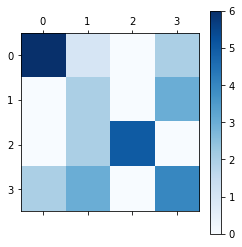

In [62]:
import matplotlib.pyplot as plt

plt.matshow(cm, cmap='Blues')
plt.colorbar()

### Visualizing the Decision Tree

The best part of a decision tree is its interpretability.  It's just based on rules and branches.

We'll visualize the learned decision tree using graphviz. 

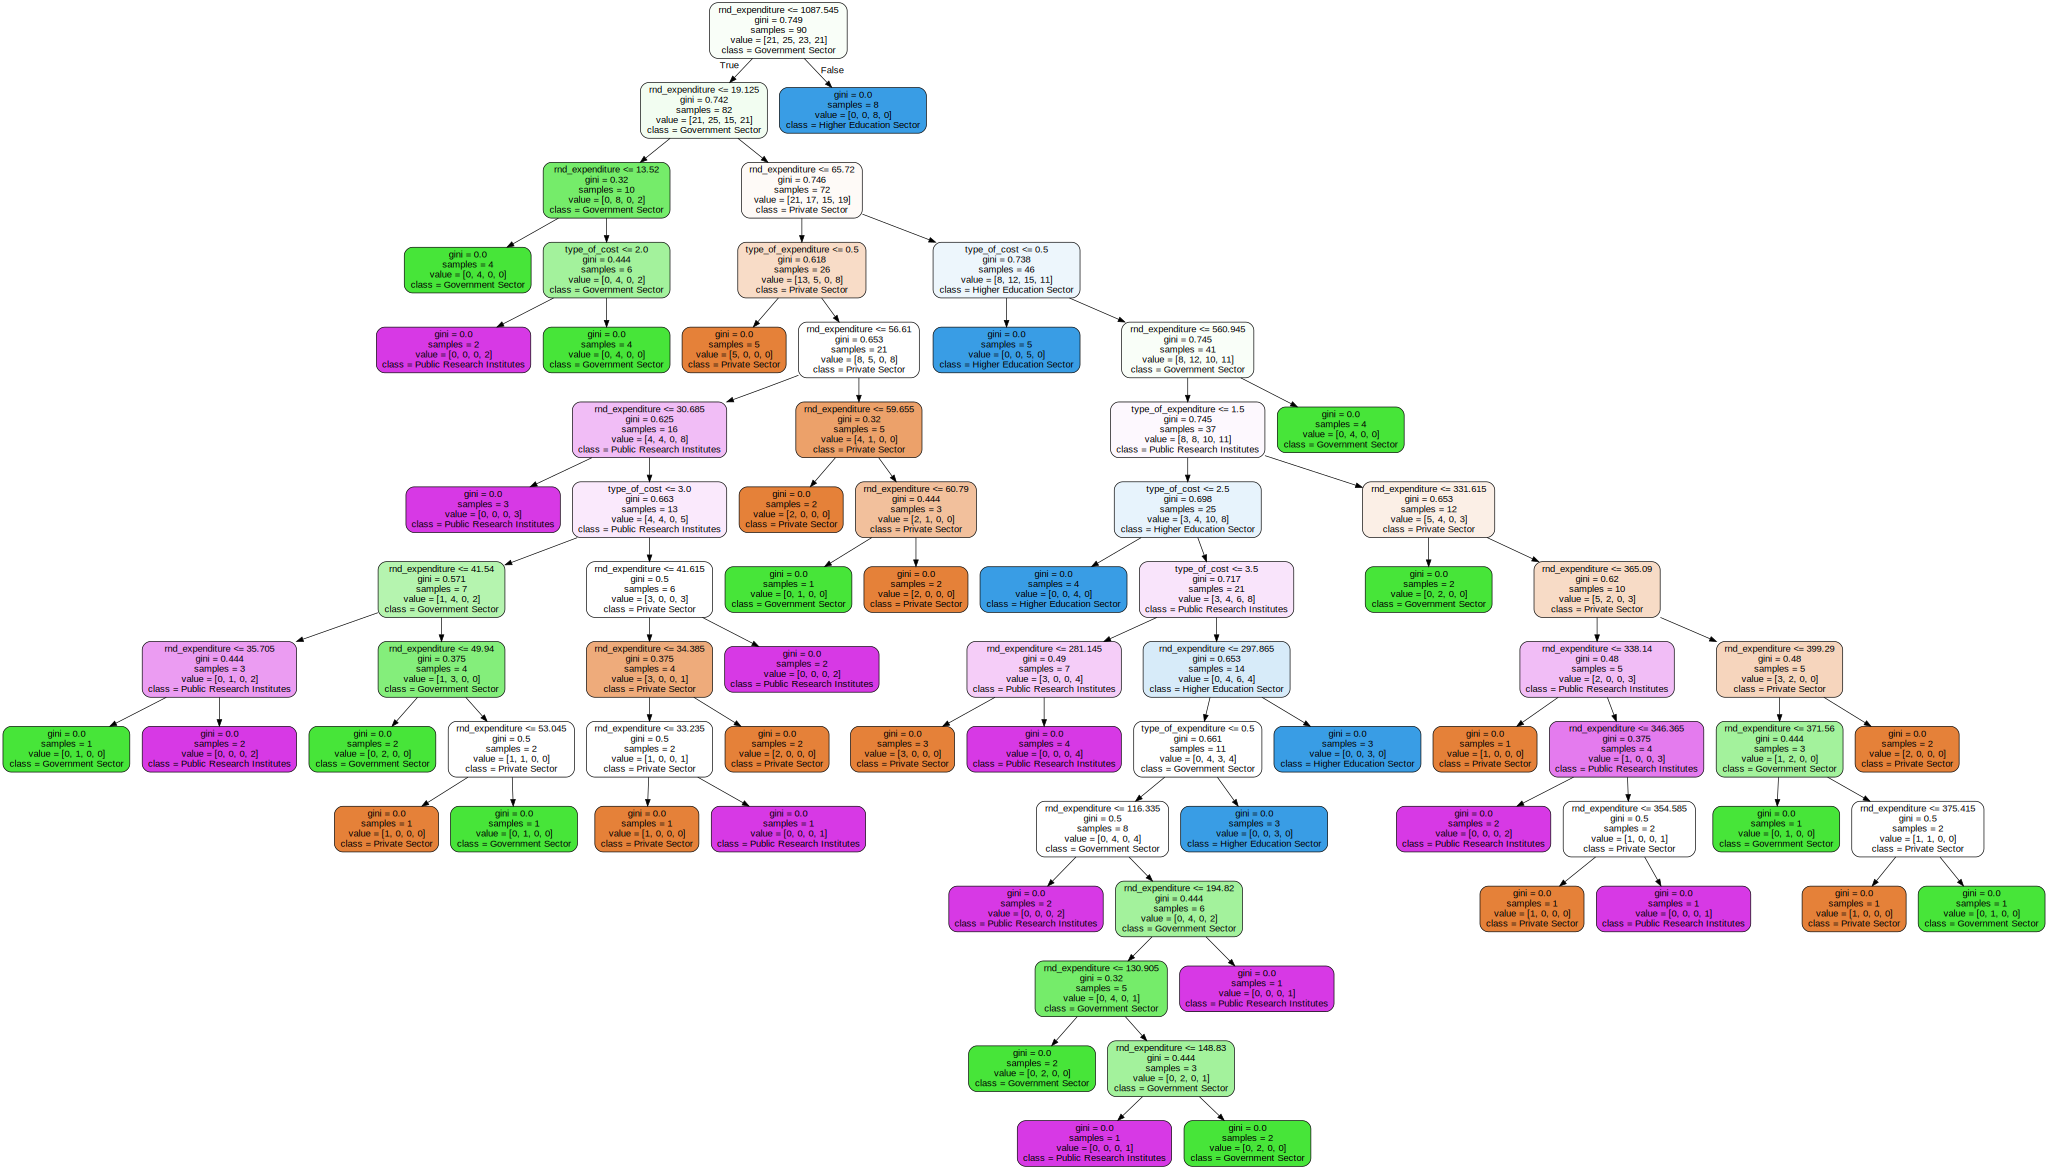

In [55]:
from sklearn.tree import export_graphviz
import graphviz

feature_names=['rnd_expenditure', 'type_of_expenditure', 'type_of_cost']
target_names=df['sector'].unique()

dot_data = export_graphviz(dtc, out_file=None, feature_names=feature_names,
                          class_names=target_names,
                          filled=True, rounded=True)
graphviz.Source(dot_data)

### Exercise - Decision Tree Classification using Entropy

Repeat the steps above to:
1. Train a decision tree using the 'entropy' criteria using the training set
2. Get the classification metrics
3. Visualize the decision tree.

Which criteria performs better?

In [ ]:
# Your code here















### Decision Surfaces

Credits: http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html